# Adult 

<p>Adult Database from UCI Machine Learning repository.</p>


---
São Paulo University

Gabriel de Souza Lima 

---



## Getting database 

In [ ]:
!wget -nc "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names" --quiet
!wget -nc "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" --quiet
!wget -nc "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" --quiet
!wget -nc "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/Index" --quiet

## Libraries import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import loguniform,randint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import os
import tempfile
from sklearn.metrics import precision_recall_curve
from tensorflow import keras

In [ ]:
plt.style.use('dark_background')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Understanding Column Names

<p>age: continuous.</p>
<p>workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.</p>
<p>fnlwgt: continuous.</p>
<p>education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.</p>
<p>education-num: continuous.</p>
<p>marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.</p>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status',
        'occupation','relationship','race','sex','capital-gain','capital-loss',
        'hours-per-week','native-country','>50K']

## Importing Data Base

### Train

In [ ]:
train = pd.read_csv('/content/adult.data',header=None)

In [ ]:
train.columns = cols 

In [ ]:
train.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [ ]:
train.shape

(32561, 15)

### Test

In [ ]:
test = pd.read_csv('/content/adult.test',skiprows=1,header=None)

In [ ]:
test.columns = cols 

In [ ]:
test.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.


## Train - Data Analysis and Data Preparation

###  Variable Types 

In [ ]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
>50K              object
dtype: object

### Missing Data

In [ ]:
train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
>50K              0
dtype: int64

In [ ]:
train.iloc[14,-2]

' ?'

In [ ]:
train = train.replace(' ?',np.nan)

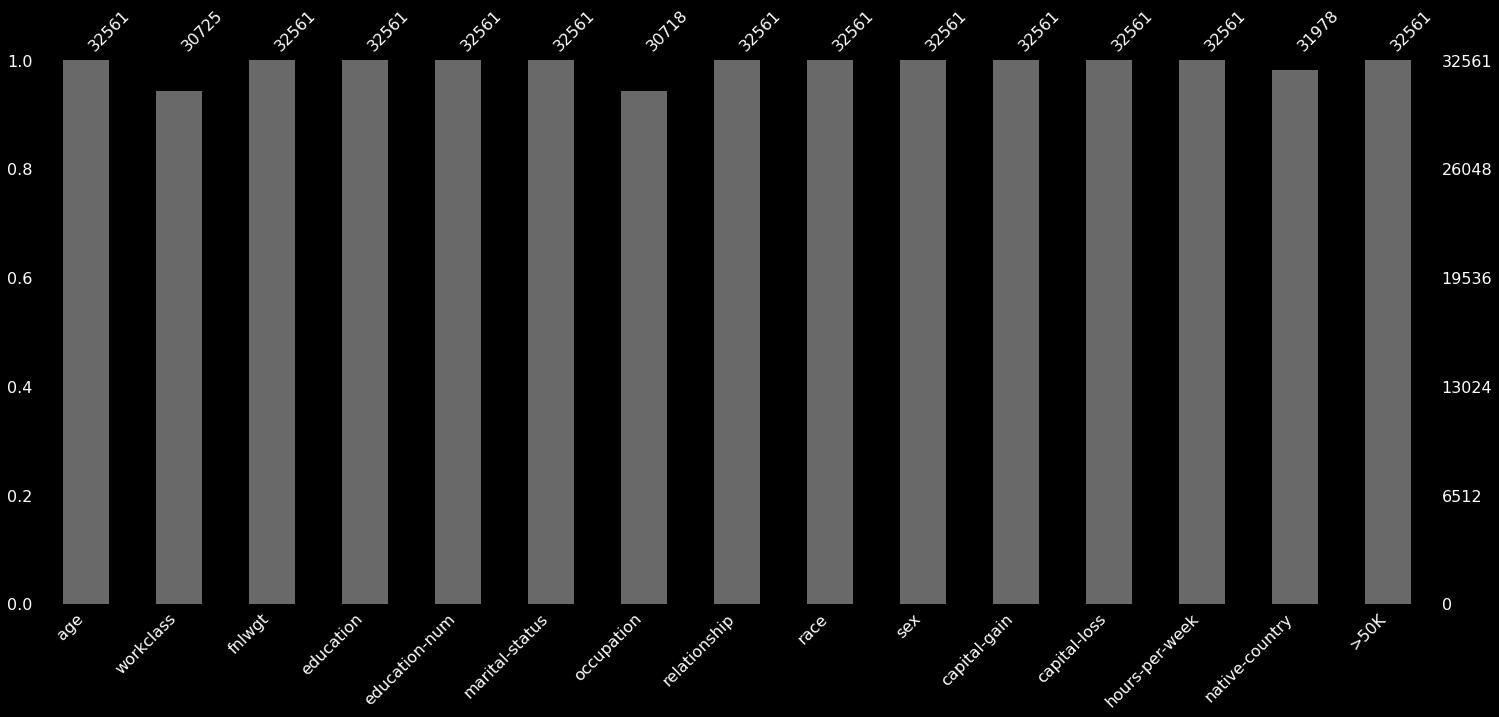

In [ ]:
ax = msno.bar(train)

In [ ]:
(train[train.isna().any(axis=1)].shape[0]/train.shape[0])*100

7.367709836921471

In [ ]:
train = train.dropna()

### Analyzing Target data Balance 

In [ ]:
train['>50K'] = train['>50K'].replace({' <=50K':0,' >50K':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


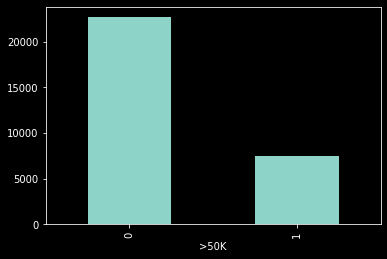

In [ ]:
ax = train.groupby('>50K').size().plot.bar()

In [ ]:
neg, pos = np.bincount(train['>50K'])
total = neg + pos

In [ ]:
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n \
   Negative: {}({:.2f}% of total)\n'.\
      format(total, pos, 100 * pos / total,neg, 100 * neg / total))

Examples:
    Total: 30162
    Positive: 7508 (24.89% of total)
    Negative: 22654(75.11% of total)



### Numerical Fetures

In [ ]:
train.describe().iloc[:,:-1]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


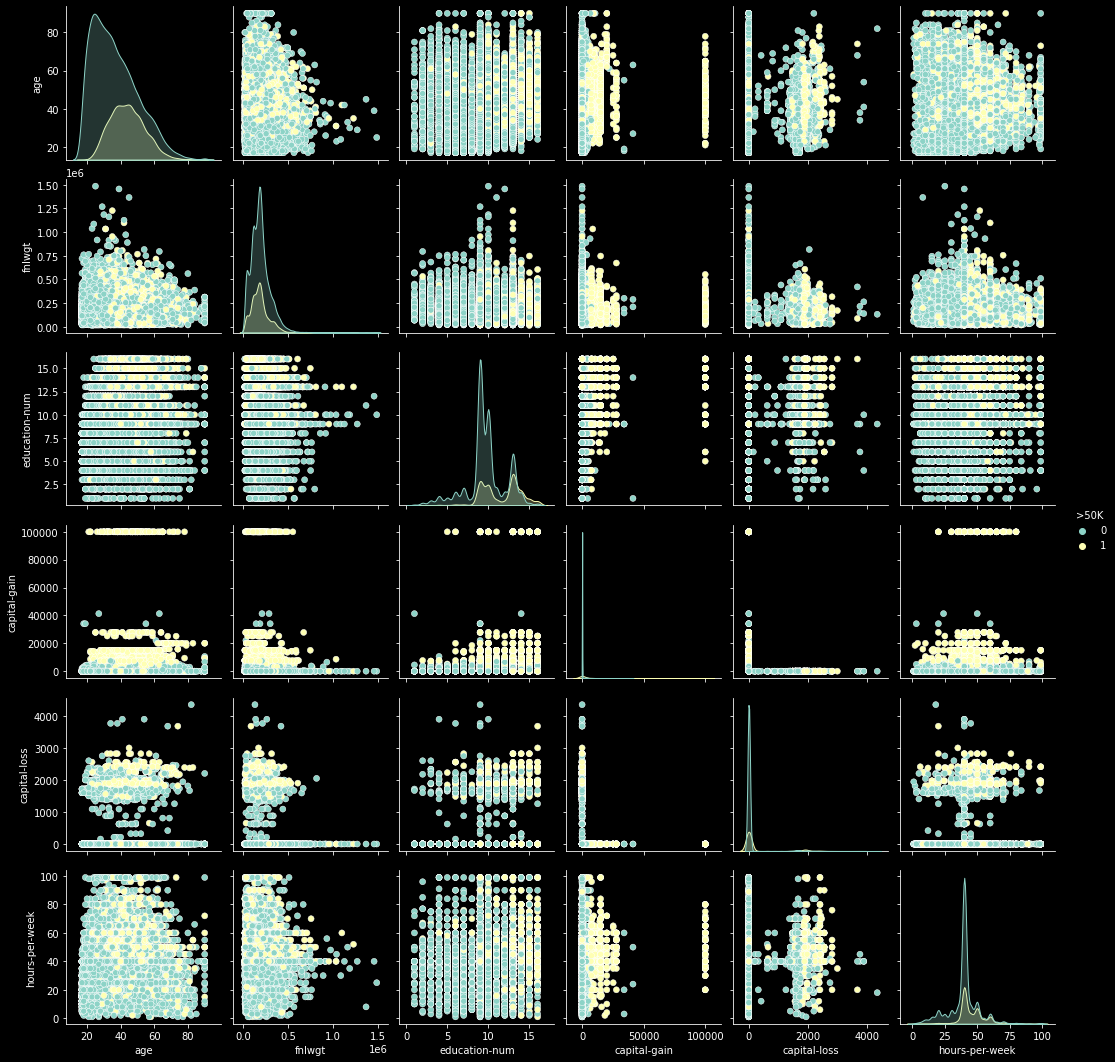

In [ ]:
ax = sns.pairplot(train,hue='>50K')

In [ ]:
train.corr().style.background_gradient(cmap='YlGnBu')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,>50K
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480
>50K,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000


#### Age

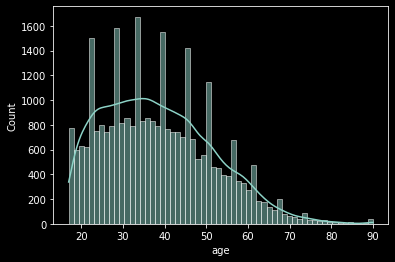

In [ ]:
ax  = sns.histplot(train['age'],kde=True)

In [ ]:
train = train[train['age'] <= train['age'].quantile(0.99)]

#### Education Num

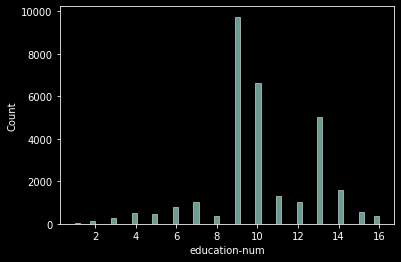

In [ ]:
ax = sns.histplot(train["education-num"])

#### Capital Gain

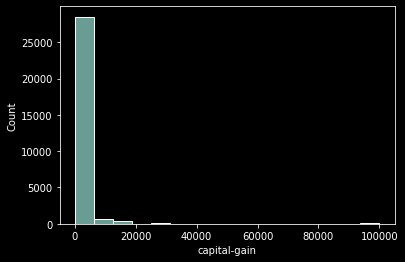

In [ ]:
ax = sns.histplot(train['capital-gain'])

#### Capital Loss

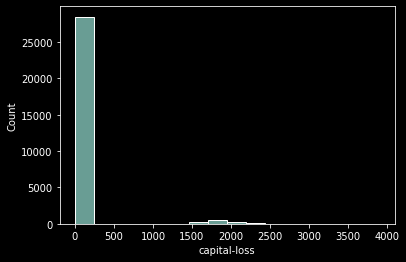

In [ ]:
ax = sns.histplot(train['capital-loss'])

#### Hours per week

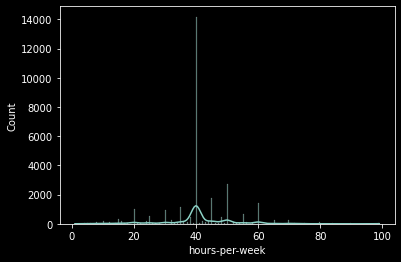

In [ ]:
ax = sns.histplot(train['hours-per-week'],kde=True)

In [ ]:
train = train[(train['hours-per-week'] > train['hours-per-week'].\
               quantile(0.01))
                                       &
              (train['hours-per-week'] < train['hours-per-week'].\
               quantile(0.99))]

### Categorical Features

In [ ]:
train.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
count,29091,29091,29091,29091,29091,29091,29091,29091
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,21662,9535,13598,3966,12047,24983,19689,26518


#### Workclass

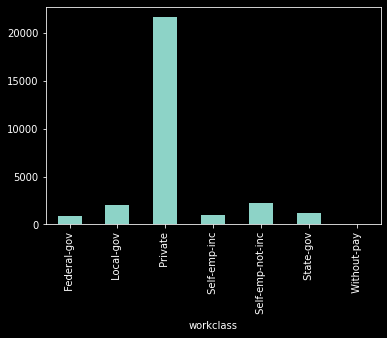

In [ ]:
ax = train.groupby(by='workclass').size().plot.bar()

In [ ]:
train['workclass'] = train['workclass'].replace({' Private':1,'[^abc]': 0},
                                                regex=True).copy()

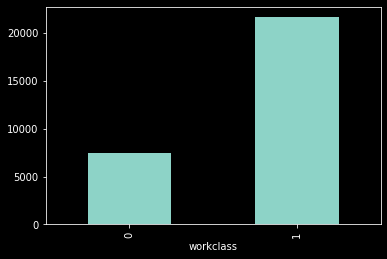

In [ ]:
ax = train.groupby(by='workclass').size().plot.bar()

#### Marital Status

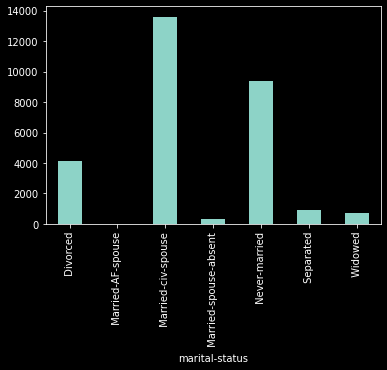

In [ ]:
ax = train.groupby(by = 'marital-status').size().plot.bar()

In [ ]:
train['marital-status'] = train['marital-status'].\
                               replace({' Married-spouse-absent':'Married',
                                        ' Married-AF-spouse':'Married',
                                        ' Married-civ-spouse':'Married',
                                        ' Separated':' Divorced'}).copy()

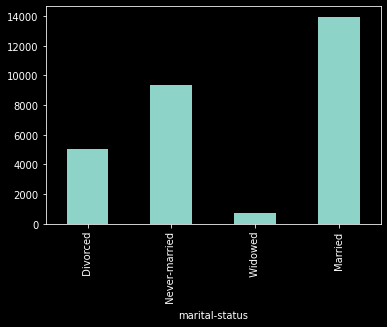

In [ ]:
ax = train.groupby(by = 'marital-status').size().plot.bar()

#### Occupation

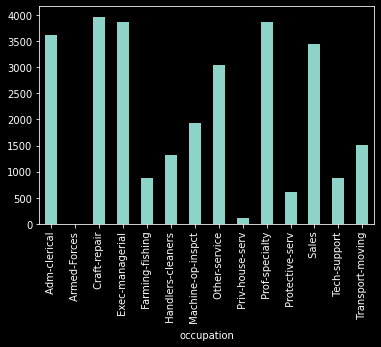

In [ ]:
ax = train.groupby('occupation').size().plot.bar()

In [ ]:
train['occupation'] = train['occupation'].\
replace({' Armed-Forces':' Other-service',
         ' Priv-house-serv':' Other-service'}).copy()

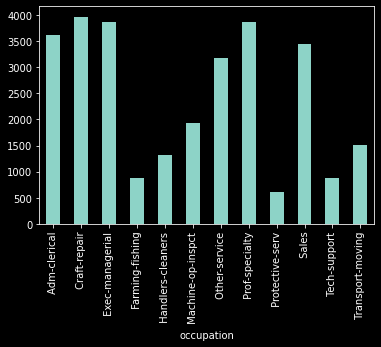

In [ ]:
ax = train.groupby('occupation').size().plot.bar()

#### Relationship

In [ ]:
train['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

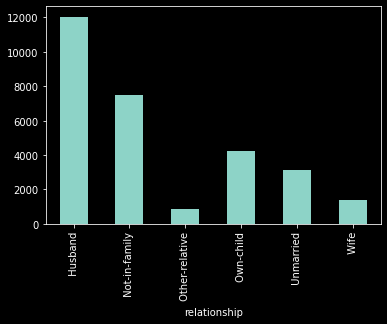

In [ ]:
ax = train.groupby('relationship').size().plot.bar()

#### Race

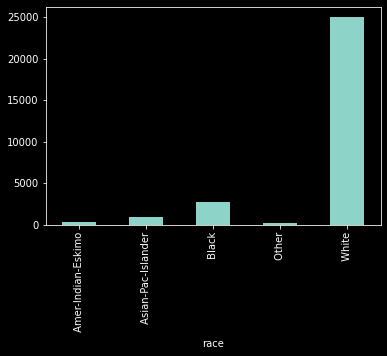

In [ ]:
ax = train.groupby(by='race').size().plot.bar()

In [ ]:
train['race'] = train['race'].replace({' White':1,
                                       '[^abc]': 0},regex=True).copy()

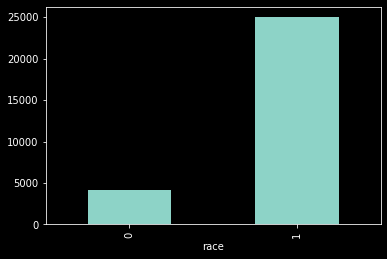

In [ ]:
ax = train.groupby(by='race').size().plot.bar()

#### Sex 

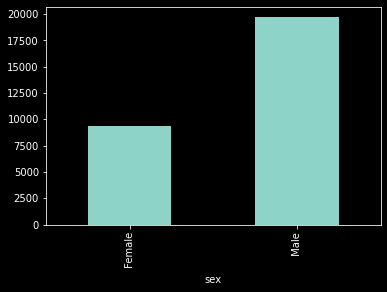

In [ ]:
ax = train.groupby(by='sex').size().plot.bar()

In [ ]:
train['sex'] = train['sex'].replace({' Female':0,' Male': 1}).copy()

#### Native country

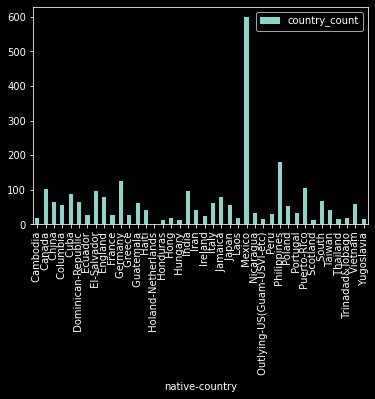

In [ ]:
ax  = train[train['native-country'] != ' United-States'].\
groupby(by='native-country').size().rename('country_count').to_frame().\
reset_index().plot.bar(x= 'native-country',y='country_count')

In [ ]:
train['native-country'] = train['native-country'].replace({' United-States':1,
                                                           '[^abc]': 0},
                                                          regex=True)

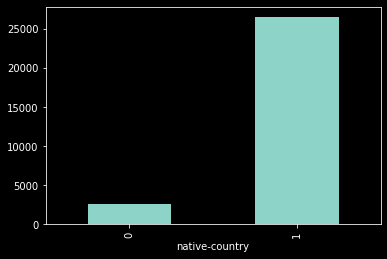

In [ ]:
ax = train.groupby(by='native-country').size().plot.bar()

### Final Train Dataset

In [ ]:
FeatureCols = ['age','workclass','education-num','marital-status',
               'occupation','race','sex','capital-gain','capital-loss',
               'hours-per-week','native-country']
TargetCol   = ['>50K']

#### Normalization

In [ ]:
sc = MinMaxScaler()

In [ ]:
X_train = sc.fit_transform(pd.get_dummies(train[FeatureCols]))

In [ ]:
y_train = train[TargetCol].to_numpy().ravel()

## Test - Data Preparation

### Missing Data

In [ ]:
test = test.replace(' ?',np.nan)

In [ ]:
test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
>50K                0
dtype: int64

In [ ]:
(test[test.isna().any(axis=1)].shape[0]/test.shape[0])*100

7.499539340335361

In [ ]:
test = test.dropna()

### Target Variable

In [ ]:
test.loc[:,'>50K'] = test['>50K'].replace({' <=50K.':0,' >50K.':1})

### Features

#### Workclass

In [ ]:
test['workclass'] = test['workclass'].replace({' Private':1,'[^abc]': 0},
                                                    regex=True).copy()

#### Marital Status

In [ ]:
test['marital-status'] = test['marital-status'].\
                               replace({' Married-spouse-absent':'Married',
                                        ' Married-AF-spouse':'Married',
                                        ' Married-civ-spouse':'Married',
                                        ' Separated':' Divorced'}).copy()

#### Occupation

In [ ]:
test['occupation'] = test['occupation'].\
replace({' Armed-Forces':' Other-service',
         ' Priv-house-serv':' Other-service'}).copy()

#### Race

In [ ]:
test['race'] = test['race'].replace({' White':1,'[^abc]': 0},regex=True).copy()

#### Sex

In [ ]:
test['sex'] = test['sex'].replace({' Female':0,' Male': 1}).copy()

#### Native Country

In [ ]:
test['native-country'] = test['native-country'].replace({' United-States':1,
                                                         '[^abc]': 0},
                                                        regex=True).copy()

### Final Test Dataset

#### Normalization

In [ ]:
X_test = sc.transform(pd.get_dummies(test[FeatureCols]))

In [ ]:
y_test = test[TargetCol].to_numpy().ravel()

## Training and Testing Models 

In [ ]:
class loguniform_int:
    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()), 
          ('XGB', XGBClassifier())
        ]

In [ ]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted',
           'f1_weighted', 'roc_auc']

In [ ]:
target_names = ['<=50K', '>50K']

In [ ]:
grid = [{ 
    'C': [1,5,8,8.5,9,10],
    'penalty': ['l2'],
    'max_iter':[10000]},
    {'n_estimators':loguniform_int(50, 200),
     'criterion':['gini','entropy'],
     'max_depth':loguniform_int(5, 15)},
     {'n_neighbors':loguniform_int(3, 8),
      'weights':['distance']},
     {'n_estimators': loguniform_int(150, 1000),
      'learning_rate': loguniform(0.01, 0.59)}]

In [ ]:
dfs = []

for num,m in enumerate(models):
  
  name, model = m
  print(f'Training model: {name}')
  kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

  rand_cv = RandomizedSearchCV(estimator=model, param_distributions=grid[num],
                       cv= kfold,scoring=scoring,refit = 'f1_weighted',
                       n_iter=5)
  
  rand_cv.fit(X_train, y_train)
  df = pd.DataFrame(rand_cv.cv_results_)[['params',
                                         'mean_test_accuracy',
                                         'mean_test_precision_weighted',
                                         'mean_test_recall_weighted',
                                         'mean_test_f1_weighted',
                                         'mean_test_roc_auc']]
  df['model'] = name
  df = df[df['params'] == rand_cv.best_params_]
  dfs.append(df)
  final = pd.concat(dfs, ignore_index=True)

Training model: LogReg
Training model: RF
Training model: KNN
Training model: XGB


In [ ]:
final.iloc[final['mean_test_f1_weighted'].idxmax(),-1]

'XGB'

In [ ]:
final.iloc[final['mean_test_f1_weighted'].idxmax(),0]

{'learning_rate': 0.12204976098133091, 'n_estimators': 923}

In [ ]:
final

,params,mean_test_accuracy,mean_test_precision_weighted,mean_test_recall_weighted,mean_test_f1_weighted,mean_test_roc_auc,model
0,"{'penalty': 'l2', 'max_iter': 10000, 'C': 8.5}",0.844901,0.838661,0.844901,0.839400,0.900667,LogReg
1,"{'criterion': 'entropy', 'max_depth': 11, 'n_e...",0.853631,0.848590,0.853631,0.844299,0.913328,RF
2,"{'n_neighbors': 7, 'weights': 'distance'}",0.810457,0.802514,0.810457,0.805006,0.829156,KNN
3,"{'learning_rate': 0.12204976098133091, 'n_esti...",0.866385,0.862076,0.866385,0.862550,0.924431,XGB


In [ ]:
model = XGBClassifier(learning_rate= 0.12204976098133091, n_estimators = 923)

In [ ]:
model = model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(name)
print(classification_report(y_test, y_pred, target_names=target_names))

XGB
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91     11360
        >50K       0.77      0.66      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.86     15060



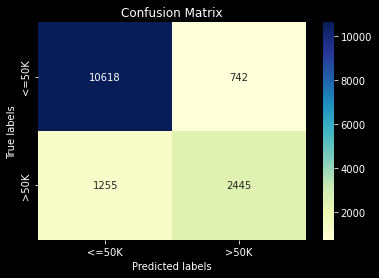

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap = 'YlGnBu');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

## Training Neural Network

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(X_train.shape[-1],),
          kernel_regularizer=keras.regularizers.l1(0.001)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(
          8, activation='relu',
          kernel_regularizer=keras.regularizers.l1(0.001)),
          keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
rna = make_model()
rna.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                416       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rna.predict(X_train[:10])

array([[0.6981773 ],
       [0.64632624],
       [0.6666773 ],
       [0.5913032 ],
       [0.5888698 ],
       [0.6532545 ],
       [0.68565756],
       [0.62446004],
       [0.7458365 ],
       [0.6427732 ]], dtype=float32)

In [ ]:
results = rna.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.0539


In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.10436732])

In [ ]:
rna = make_model(output_bias=initial_bias)
rna.predict(X_train[:10])

array([[0.16626114],
       [0.21451792],
       [0.2489225 ],
       [0.2489225 ],
       [0.20849833],
       [0.21806517],
       [0.20170626],
       [0.21115535],
       [0.23043036],
       [0.20225805]], dtype=float32)

In [ ]:
results = rna.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6560


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
rna.save_weights(initial_weights)

In [ ]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, thresholds = precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    
    return precision, recall, thresholds

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Ocurrencies Detected (True Negatives): ', cm[0][0])
  print('Legitimate Ocurrencies Incorrectly Detected (False Positives): ', cm[0][1])
  print('False Ocurrencies Missed (False Negatives): ', cm[1][0])
  print('False Ocurrencies Detected (True Positives): ', cm[1][1])
  print('Total Occurencies: ', np.sum(cm[1]))
  return cm[0][0],cm[0][1],cm[1][0],cm[1][1]

In [ ]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.67
Weight for class 1: 2.01


In [ ]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks=[early_stopping],
    validation_split=0.2,
    class_weight=class_weight)

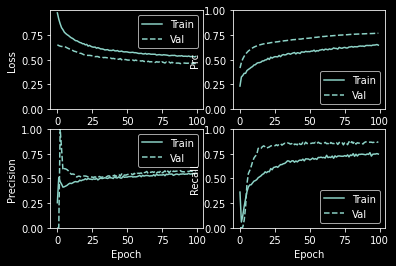

In [ ]:
plot_metrics(weighted_history)

In [ ]:
y_test_rna_pred  = weighted_model.predict(X_test)

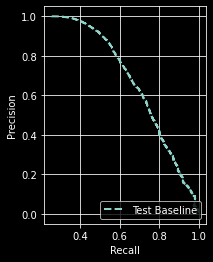

In [ ]:
precision, recall, thresholds = plot_prc("Test Baseline", 
                                         y_test, y_test_rna_pred, 
                                         color=colors[0], linestyle='--')
plt.legend(loc='lower right');

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)

In [ ]:
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)

In [ ]:
print(thresholdOpt)
print(fscoreOpt)
print(recallOpt)
print(precisionOpt)

0.5979
0.6783
0.7535
0.6167


In [ ]:
print(classification_report(y_test, y_test_rna_pred > 0.5897, 
                            target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.92      0.84      0.88     11360
        >50K       0.61      0.76      0.68      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.80      0.78     15060
weighted avg       0.84      0.82      0.83     15060



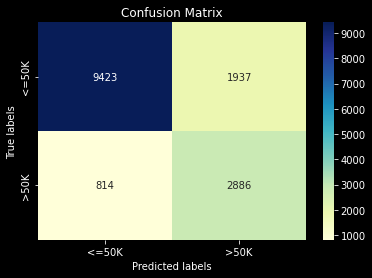

In [ ]:
ax= plt.subplot()
cm = confusion_matrix(y_test, y_test_rna_pred > 0.575)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap = 'YlGnBu');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);